Loading Dataset

In [ ]:
## 1. Import Packages
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

In [ ]:
## 2. Load Dataset
from google.colab import files
uploaded = files.upload()

Saving Annual_Collision_Report__Fatalities_and_Injuries.csv to Annual_Collision_Report__Fatalities_and_Injuries (1).csv


In [ ]:
import io
df1 = pd.read_csv(io.BytesIO(uploaded['Annual_Collision_Report__Fatalities_and_Injuries.csv']))
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1514 entries, 0 to 1513
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Collision Report Year           1514 non-null   int64 
 1   Sum of Injuries and Fatalities  1514 non-null   int64 
 2   Injury Severity                 1514 non-null   object
 3   Injury Age Group                1514 non-null   object
 4   Injury Gender                   1514 non-null   object
 5   Traffic Control Name            1514 non-null   object
 6   Injury Mode                     1514 non-null   object
dtypes: int64(2), object(5)
memory usage: 82.9+ KB


In [ ]:
df1 = df1.reindex(['Collision Report Year','Injury Severity','Injury Age Group','Injury Gender', 'Traffic Control Name', 'Injury Mode', 'Sum of Injuries and Fatalities'], axis=1)

In [ ]:
df1 = df1.rename(columns={'Collision Report Year': 'Report_Year', 'Injury Severity': 'Injury_Severity', 'Injury Age Group': 'Age_Group', 'Injury Gender': 'Gender', 'Traffic Control Name': 'Traffic_Control', 'Injury Mode': 'Injury_Mode', 'Sum of Injuries and Fatalities': 'Sum_Fatalities_Injuries' })

In [ ]:
list(df1)
df1.shape
df1.info()
df1.describe().transpose()
df1.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1514 entries, 0 to 1513
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Report_Year              1514 non-null   int64 
 1   Injury_Severity          1514 non-null   object
 2   Age_Group                1514 non-null   object
 3   Gender                   1514 non-null   object
 4   Traffic_Control          1514 non-null   object
 5   Injury_Mode              1514 non-null   object
 6   Sum_Fatalities_Injuries  1514 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 82.9+ KB


,Report_Year,Injury_Severity,Age_Group,Gender,Traffic_Control,Injury_Mode,Sum_Fatalities_Injuries
0,2019,FATAL,19 - 24,MALE,SIGNAL LIGHT,VEHICLE PASSENGR,1
1,2019,FATAL,25 - 34,FEMALE,NO CNTRL. PRES.,MOTORCYCLIST,1
2,2019,FATAL,25 - 34,FEMALE,NO CNTRL. PRES.,VEHICLE DRIVER,1
3,2019,FATAL,25 - 34,MALE,NO CNTRL. PRES.,MOTORCYCLIST,2
4,2019,FATAL,45 - 54,FEMALE,YIELD SIGN,VEHICLE DRIVER,1


Data Exploration & Analysis

In [ ]:
df1['Injury_Severity'].value_counts()

MINOR      1074
MAJOR       258
SERIOUS     145
FATAL        37
Name: Injury_Severity, dtype: int64

In [ ]:
df1['Age_Group'].value_counts()

25 - 34     239
35 - 44     213
55 - 64     180
45 - 54     179
19 - 24     173
65 - 74     118
Under 14    100
16 - 18      99
75+          89
Unknown      68
14 - 15      56
Name: Age_Group, dtype: int64

In [ ]:
df1['Gender'].value_counts()

MALE       777
FEMALE     723
UNKNOWN     10
Others       4
Name: Gender, dtype: int64

In [ ]:
df1['Traffic_Control'].value_counts()

SIGNAL LIGHT        402
NO CNTRL. PRES.     402
STOP SIGN           218
YIELD SIGN          140
MARK.PED.X-WALK     109
PED. ACT. SIGNAL     80
PED. FLASH. AMBE     45
CONSTRUCTION         29
WARN/ADV. LIGHT      21
ONE WAY SIGN         18
MERGE SIGN           14
POLICE CONTROL       13
RR.X-ING SGN/CTL     11
RRFB                  8
FLAGMAN               4
Name: Traffic_Control, dtype: int64

In [ ]:
df1['Injury_Mode'].value_counts()

VEHICLE DRIVER      482
VEHICLE PASSENGR    346
PEDESTRIAN          303
BICYCLIST           195
MOTORCYCLIST         98
UNKNOWN              66
E-SCOOTER RIDER      13
OTHER                11
Name: Injury_Mode, dtype: int64

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


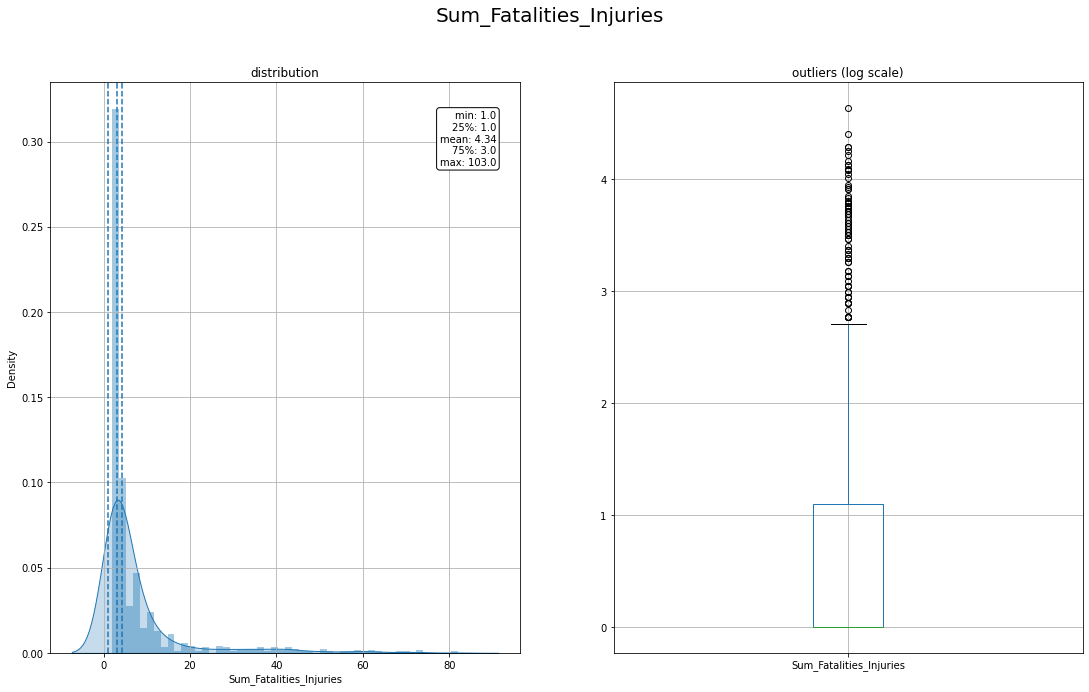

In [ ]:
x = "Sum_Fatalities_Injuries"
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
fig.suptitle(x, fontsize=20)
fig.set_size_inches(18.5, 10.5)
### distribution
ax[0].title.set_text('distribution')
variable = df1[x].fillna(df1[x].mean())
breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
variable = variable[ (variable > breaks[0]) & (variable < 
                    breaks[10]) ]
sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
des = df1[x].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["mean"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))
### boxplot 
ax[1].title.set_text('outliers (log scale)')
tmp_df1 = pd.DataFrame(df1[x])
tmp_df1[x] = np.log(df1[x])
tmp_df1.boxplot(column=x, ax=ax[1])
plt.show()

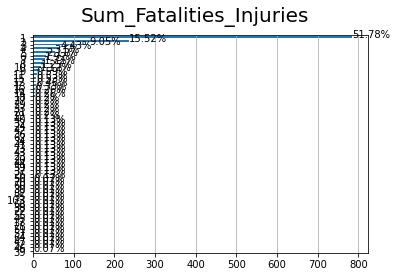

In [ ]:
ax = df1[x].value_counts().sort_values().plot(kind="barh")
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
ax.grid(axis="x")
plt.suptitle(x, fontsize=20)
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

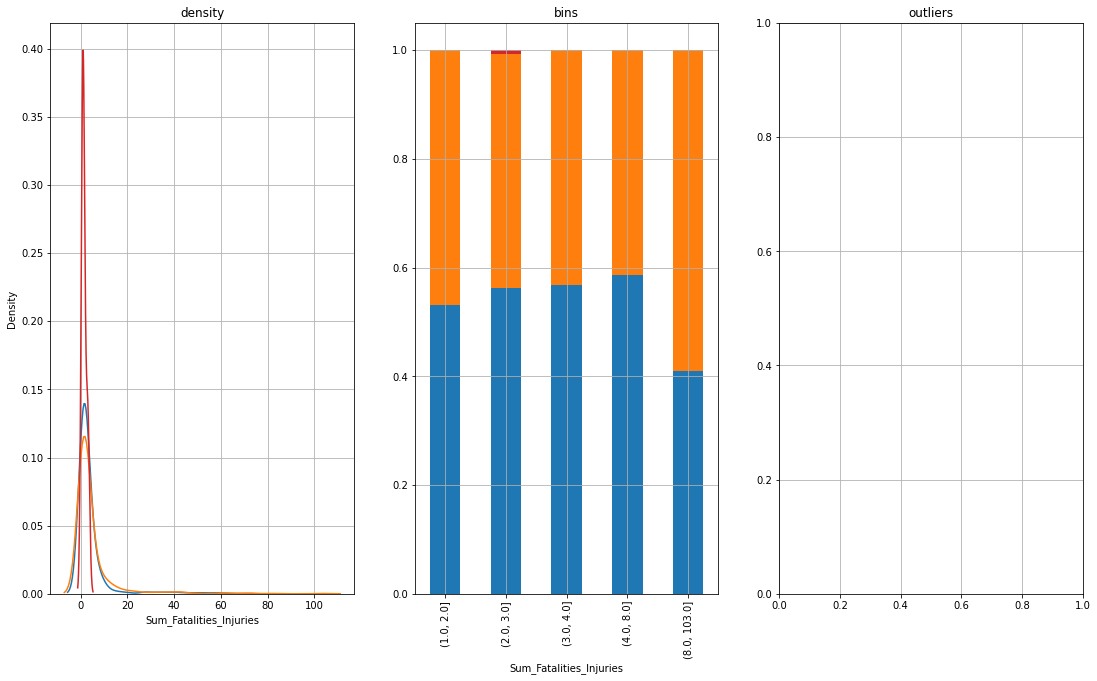

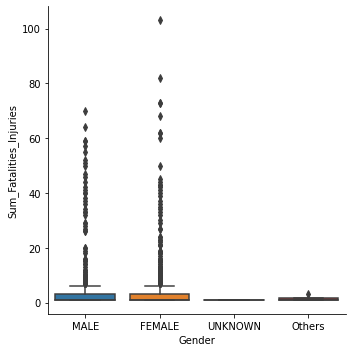

In [ ]:
cat, num = "Gender", "Sum_Fatalities_Injuries"
fig, ax = plt.subplots(nrows=1, ncols=3,  sharex=False, sharey=False)
#fig.suptitle(x+"   vs   "+y, fontsize=20)
fig.set_size_inches(18.5, 10.5)
            
### distribution
ax[0].title.set_text('density')
for i in df1[cat].unique():
    sns.distplot(df1[df1[cat]==i][num], hist=False, label=i, ax=ax[0])
ax[0].grid(True)
### stacked
ax[1].title.set_text('bins')
breaks = np.quantile(df1[num], q=np.linspace(0,1,11))
tmp = df1.groupby([cat, pd.cut(df1[num], breaks, duplicates='drop')]).size().unstack().T
tmp = tmp[df1[cat].unique()]
tmp["tot"] = tmp.sum(axis=1)
for col in tmp.drop("tot", axis=1).columns:
     tmp[col] = tmp[col] / tmp["tot"]
tmp.drop("tot", axis=1).plot(kind='bar', stacked=True, ax=ax[1], legend=False, grid=True)
### boxplot   
ax[2].title.set_text('outliers')
sns.catplot(x=cat, y=num, data=df1, kind="box", ax=ax[2])
ax[2].grid(True)
plt.show()

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
cat, num = "Gender", "Sum_Fatalities_Injuries"
model = ols(num+' ~ '+cat, data=df1).fit()
table = sm.stats.anova_lm(model)
p = table["PR(>F)"][0]
coeff, p = None, round(p, 3)
conclusion = "Correlated" if p < 0.05 else "Non-Correlated"
print("Anova F: the variables are", conclusion, "(p-value: "+str(p)+")")

#Gender does not appear to be predictive to sum of injuries and fatalities!

Anova F: the variables are Non-Correlated (p-value: 0.299)


In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
cat, num = "Injury_Severity", "Sum_Fatalities_Injuries"
model = ols(num+' ~ '+cat, data=df1).fit()
table = sm.stats.anova_lm(model)
p = table["PR(>F)"][0]
coeff, p = None, round(p, 3)
conclusion = "Correlated" if p < 0.05 else "Non-Correlated"
print("Anova F: the variables are", conclusion, "(p-value: "+str(p)+")")

Anova F: the variables are Correlated (p-value: 0.0)


In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
cat, num = "Age_Group", "Sum_Fatalities_Injuries"
model = ols(num+' ~ '+cat, data=df1).fit()
table = sm.stats.anova_lm(model)
p = table["PR(>F)"][0]
coeff, p = None, round(p, 3)
conclusion = "Correlated" if p < 0.05 else "Non-Correlated"
print("Anova F: the variables are", conclusion, "(p-value: "+str(p)+")")

Anova F: the variables are Correlated (p-value: 0.0)


In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
cat, num = "Traffic_Control", "Sum_Fatalities_Injuries"
model = ols(num+' ~ '+cat, data=df1).fit()
table = sm.stats.anova_lm(model)
p = table["PR(>F)"][0]
coeff, p = None, round(p, 3)
conclusion = "Correlated" if p < 0.05 else "Non-Correlated"
print("Anova F: the variables are", conclusion, "(p-value: "+str(p)+")")

Anova F: the variables are Correlated (p-value: 0.0)


In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
cat, num = "Injury_Mode", "Sum_Fatalities_Injuries"
model = ols(num+' ~ '+cat, data=df1).fit()
table = sm.stats.anova_lm(model)
p = table["PR(>F)"][0]
coeff, p = None, round(p, 3)
conclusion = "Correlated" if p < 0.05 else "Non-Correlated"
print("Anova F: the variables are", conclusion, "(p-value: "+str(p)+")")

Anova F: the variables are Correlated (p-value: 0.0)


Data Preprocessing

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder

In [ ]:
df1 = pd.get_dummies(df1)

In [ ]:
import movecolumn as mc
mc.MoveToLast(df1,'Sum_Fatalities_Injuries')

,Report_Year,Injury_Severity_FATAL,Injury_Severity_MAJOR,Injury_Severity_MINOR,Injury_Severity_SERIOUS,Age_Group_14 - 15,Age_Group_16 - 18,Age_Group_19 - 24,Age_Group_25 - 34,Age_Group_35 - 44,...,Traffic_Control_YIELD SIGN,Injury_Mode_BICYCLIST,Injury_Mode_E-SCOOTER RIDER,Injury_Mode_MOTORCYCLIST,Injury_Mode_OTHER,Injury_Mode_PEDESTRIAN,Injury_Mode_UNKNOWN,Injury_Mode_VEHICLE DRIVER,Injury_Mode_VEHICLE PASSENGR,Sum_Fatalities_Injuries
0,2019,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
1,2019,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,2019,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
3,2019,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,2
4,2019,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1509,2021,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1510,2021,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1511,2021,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1512,2021,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1514 entries, 0 to 1513
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Report_Year                       1514 non-null   int64
 1   Injury_Severity_FATAL             1514 non-null   uint8
 2   Injury_Severity_MAJOR             1514 non-null   uint8
 3   Injury_Severity_MINOR             1514 non-null   uint8
 4   Injury_Severity_SERIOUS           1514 non-null   uint8
 5   Age_Group_14 - 15                 1514 non-null   uint8
 6   Age_Group_16 - 18                 1514 non-null   uint8
 7   Age_Group_19 - 24                 1514 non-null   uint8
 8   Age_Group_25 - 34                 1514 non-null   uint8
 9   Age_Group_35 - 44                 1514 non-null   uint8
 10  Age_Group_45 - 54                 1514 non-null   uint8
 11  Age_Group_55 - 64                 1514 non-null   uint8
 12  Age_Group_65 - 74                 

In [ ]:
# #Label Encoding
# label_columns = ['Report_Year', 'Injury_Severity', 'Age_Group', 'Gender', 'Traffic_Control', 'Injury_Mode']

# #To-Do: determine if OHE might be more appropriate (binarized variables vs. multiclass labels)

In [ ]:
# class MultiColumnLabelEncoder:
#     def __init__(self,columns = None):
#         self.columns = columns # array of column names to encode

#     def fit(self,X,y=None):
#         return self # not relevant here

#     def transform(self,X):
#         '''
#         Transforms columns of X specified in self.columns using
#         LabelEncoder(). If no columns specified, transforms all
#         columns in X.
#         '''
#         output = X.copy()
#         if self.columns is not None:
#             for col in self.columns:
#                 output[col] = LabelEncoder().fit_transform(output[col])
#         else:
#             for colname,col in output.iteritems():
#                 output[colname] = LabelEncoder().fit_transform(col)
#         return output

#     def fit_transform(self,X,y=None):
#         return self.fit(X,y).transform(X)

In [ ]:
# df2 = MultiColumnLabelEncoder(columns = df1[label_columns]).fit_transform(df1)

In [ ]:
## split data
df_train, df_test = model_selection.train_test_split(df1, 
                      test_size=0.3)
## print info
print("X_train shape:", df_train.drop("Sum_Fatalities_Injuries",axis=1).shape, "| X_train shape:", df_test.drop("Sum_Fatalities_Injuries",axis=1).shape)
print("y_train mean:", round(np.mean(df_train["Sum_Fatalities_Injuries"]),2), "| y_test mean:", round(np.mean(df_test["Sum_Fatalities_Injuries"]),2))
print(df_train.shape[1], "features:", df_train.drop("Sum_Fatalities_Injuries",axis=1).columns.to_list())

X_train shape: (1059, 43) | X_train shape: (455, 43)
y_train mean: 4.49 | y_test mean: 3.97
44 features: ['Report_Year', 'Injury_Severity_FATAL', 'Injury_Severity_MAJOR', 'Injury_Severity_MINOR', 'Injury_Severity_SERIOUS', 'Age_Group_14 - 15', 'Age_Group_16 - 18', 'Age_Group_19 - 24', 'Age_Group_25 - 34', 'Age_Group_35 - 44', 'Age_Group_45 - 54', 'Age_Group_55 - 64', 'Age_Group_65 - 74', 'Age_Group_75+', 'Age_Group_Under 14', 'Age_Group_Unknown', 'Gender_FEMALE', 'Gender_MALE', 'Gender_Others', 'Gender_UNKNOWN', 'Traffic_Control_CONSTRUCTION', 'Traffic_Control_FLAGMAN', 'Traffic_Control_MARK.PED.X-WALK', 'Traffic_Control_MERGE SIGN', 'Traffic_Control_NO CNTRL. PRES.', 'Traffic_Control_ONE WAY SIGN', 'Traffic_Control_PED. ACT. SIGNAL', 'Traffic_Control_PED. FLASH. AMBE', 'Traffic_Control_POLICE CONTROL', 'Traffic_Control_RR.X-ING SGN/CTL', 'Traffic_Control_RRFB', 'Traffic_Control_SIGNAL LIGHT', 'Traffic_Control_STOP SIGN', 'Traffic_Control_WARN/ADV. LIGHT', 'Traffic_Control_YIELD SIGN',

Text(0.5, 1.0, 'pearson correlation')

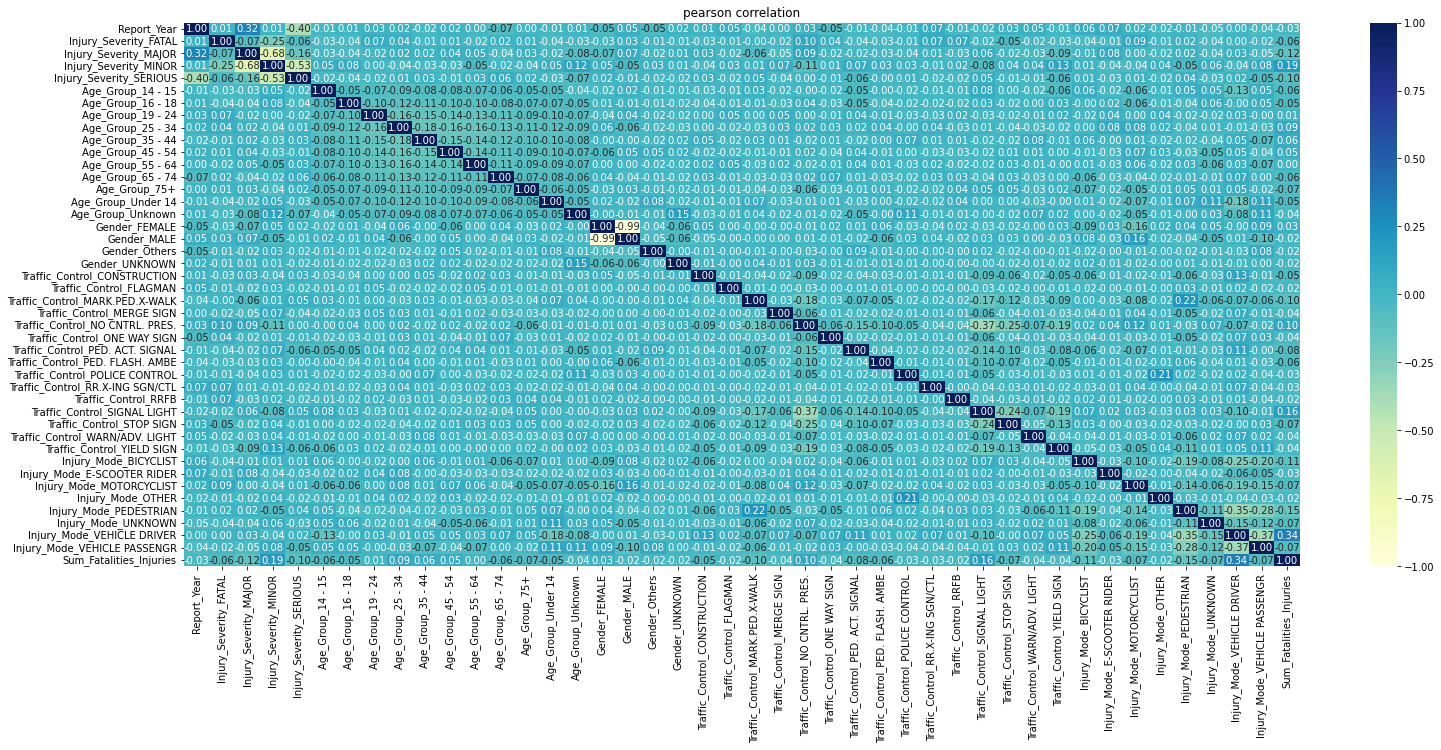

In [ ]:
corr_matrix = df_train.corr(method="pearson")
plt.figure(figsize = (25,10))
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True)
plt.title("pearson correlation")

#which would be the best correlation method to use?

Feature Selection

[2.23178408e-03 1.06030753e-04 1.79313362e-05 2.17491019e-01
 3.08939080e-04 2.42893732e-03 9.04542471e-03 5.17801286e-05
 3.05215919e-02 8.39831417e-03 4.56770832e-03 2.23747643e-04
 5.52318306e-03 8.40041709e-03 0.00000000e+00 1.01453651e-02
 1.06200953e-03 1.38895572e-04 0.00000000e+00 5.44108353e-04
 1.75961306e-03 0.00000000e+00 1.98137101e-03 3.10082474e-03
 1.47834653e-01 1.82216026e-03 3.20478478e-03 1.62158978e-03
 5.08216248e-04 0.00000000e+00 0.00000000e+00 2.14983246e-01
 1.73064203e-03 1.83058313e-03 6.48445189e-04 3.74313208e-04
 0.00000000e+00 1.27160645e-05 0.00000000e+00 0.00000000e+00
 5.95298210e-04 3.09165039e-01 7.61931705e-03]


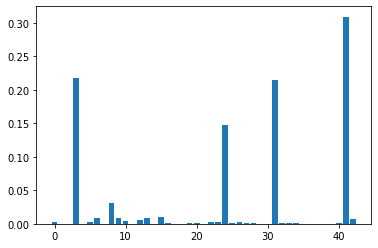

In [ ]:
### Method 1: Ensemble Method

from matplotlib import pyplot
X = df_train.drop("Sum_Fatalities_Injuries", axis=1).values
y = df_train["Sum_Fatalities_Injuries"].values
feature_names = df_train.drop("Sum_Fatalities_Injuries", axis=1).columns.tolist()
model = ensemble.GradientBoostingRegressor()
model.fit(X, y)
# feature importance
print(model.feature_importances_)
# plot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

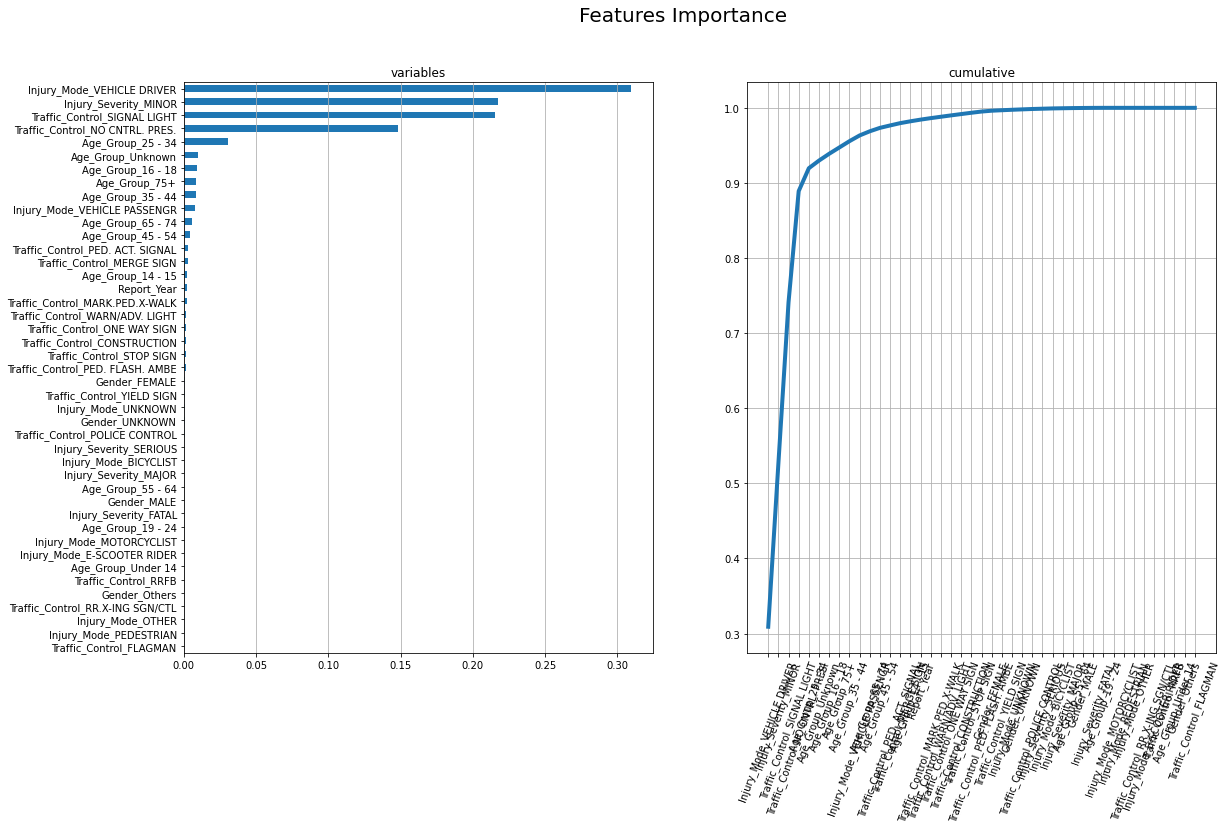

In [ ]:
from matplotlib import pyplot
X = df_train.drop("Sum_Fatalities_Injuries", axis=1).values
y = df_train["Sum_Fatalities_Injuries"].values
feature_names = df_train.drop("Sum_Fatalities_Injuries", axis=1).columns.tolist()
## call model
model = ensemble.GradientBoostingRegressor()
## Importance
model.fit(X,y)
importances = model.feature_importances_
## Put in a pandas df
df_importances = pd.DataFrame({"IMPORTANCE":importances, 
            "VARIABLE":feature_names}).sort_values("IMPORTANCE", 
            ascending=False)
df_importances["cumsum"] = df_importances["IMPORTANCE"].cumsum(axis=0)
df_importances = df_importances.set_index("VARIABLE")
    
## Plot
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False)
fig.set_size_inches(18.5, 10.5)
fig.suptitle("Features Importance", fontsize=20)
ax[0].title.set_text('variables')
df_importances[["IMPORTANCE"]].sort_values(by="IMPORTANCE").plot(kind="barh", legend=False, ax=ax[0]).grid(axis="x")
ax[0].set(ylabel="")
ax[1].title.set_text('cumulative')
df_importances[["cumsum"]].plot(kind="line", linewidth=4, 
                                 legend=False, ax=ax[1])
ax[1].set(xlabel="", xticks=np.arange(len(df_importances)), 
          xticklabels=df_importances.index)
plt.xticks(rotation=70)
plt.grid(axis='both')
plt.show()

In [ ]:
X_names = ['Injury_Mode_VEHICLE DRIVER', 'Injury_Severity_MINOR', 'Traffic_Control_SIGNAL LIGHT', "Traffic_Control_NO CNTRL. PRES.", "Age_Group_25 - 34"]
X_train = df_train[X_names].values
y_train = df_train["Sum_Fatalities_Injuries"].values
X_test = df_test[X_names].values
y_test = df_test["Sum_Fatalities_Injuries"].values

In [ ]:
### Method 2: K Best Method

# selector = feature_selection.SelectKBest(score_func=  
#                feature_selection.f_regression, k=10).fit(X,y)
# pvalue_selected_features = feature_names[selector.get_support()]

# ## regularization
# selector = feature_selection.SelectFromModel(estimator= 
#               linear_model.Ridge(alpha=1.0, fit_intercept=True), 
#                                  max_features=10).fit(X,y)
# regularization_selected_features = feature_names[selector.get_support()]
 
# ## plot
# df_features = pd.DataFrame({"features":feature_names})
# df_features["p_value"] = df_features["features"].apply(lambda x: "p_value" if x in pvalue_selected_features else "")
# df_features["num1"] = df_features["features"].apply(lambda x: 1 if x in pvalue_selected_features else 0)
# df_features["regularization"] = df_features["features"].apply(lambda x: "regularization" if x in regularization_selected_features else "")
# df_features["num2"] = df_features["features"].apply(lambda x: 1 if x in regularization_selected_features else 0)
# df_features["method"] = df_features[["p_value","regularization"]].apply(lambda x: (x[0]+" "+x[1]).strip(), axis=1)
# df_features["selection"] = df_features["num1"] + df_features["num2"]
# df_features["method"] = df_features["method"].apply(lambda x: "both" if len(x.split()) == 2 else x)
# sns.barplot(y="features", x="selection", hue="method", data=df_features.sort_values("selection", ascending=False), dodge=False)

In [ ]:
from sklearn.linear_model import LinearRegression

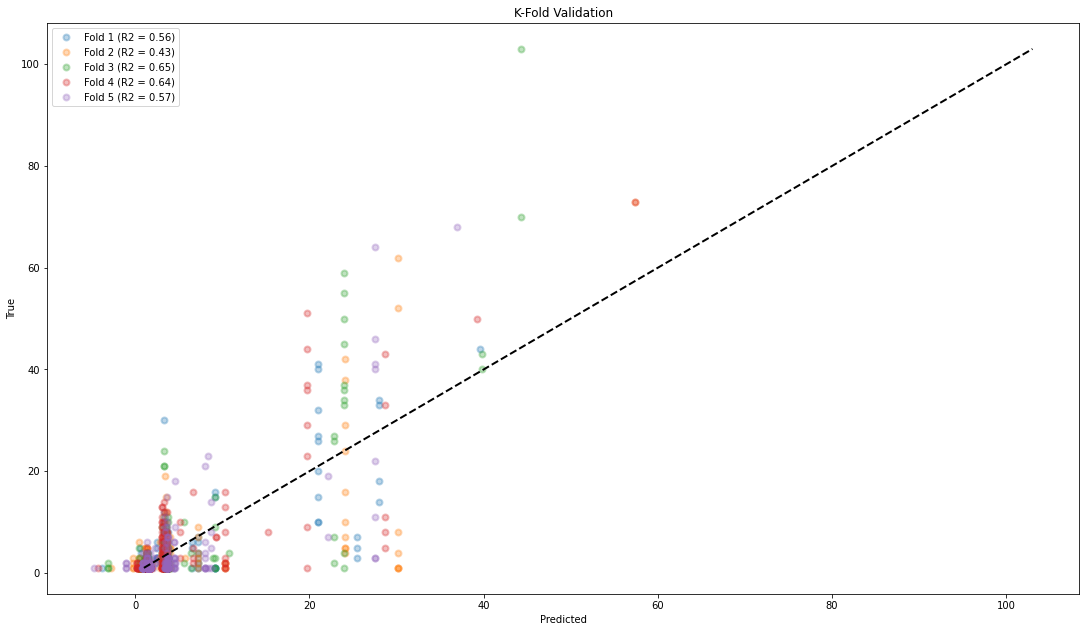

In [ ]:
model = ensemble.GradientBoostingRegressor()
# K fold validation
scores = []
cv = model_selection.KFold(n_splits=5, shuffle=True)
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
i = 1
for train, test in cv.split(X_train, y_train):
    prediction = model.fit(X_train[train],
                 y_train[train]).predict(X_train[test])
    true = y_train[test]
    score = metrics.r2_score(true, prediction)
    scores.append(score)
    plt.scatter(prediction, true, lw=2, alpha=0.3, 
                label='Fold %d (R2 = %0.2f)' % (i,score))
    i = i+1
plt.plot([min(y_train),max(y_train)], [min(y_train),max(y_train)], 
         linestyle='--', lw=2, color='black')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('K-Fold Validation')
plt.legend()
plt.show()

In [ ]:
## train
model.fit(X_train, y_train)
## test
predictions = model.predict(X_test)

Text(0, 0.5, 'Predicted Y')

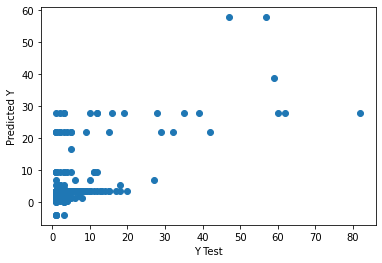

In [ ]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3.131922931500325
MSE: 40.44068905589053
RMSE: 6.359299415493072


/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


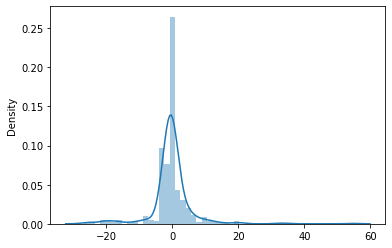

In [ ]:
sns.distplot((y_test-predictions),bins=50);

In [ ]:
## Kpi
print("R2 (explained variance):", round(metrics.r2_score(y_test, predictions), 2))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predictions)/predictions)), 2))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.0f}".format(metrics.mean_absolute_error(y_test, predictions)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.0f}".format(np.sqrt(metrics.mean_squared_error(y_test, predictions))))
## residuals
residuals = y_test - predictions
max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
max_true, max_pred = y_test[max_idx], predictions[max_idx]
print("Max Error:", "{:,.0f}".format(max_error))

R2 (explained variance): 0.42
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.95
Mean Absolute Error (Σ|y-pred|/n): 3
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 6
Max Error: 54


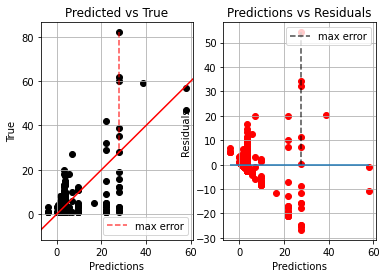

In [ ]:
## Plot predicted vs true
fig, ax = plt.subplots(nrows=1, ncols=2)
from statsmodels.graphics.api import abline_plot
ax[0].scatter(predictions, y_test, color="black")
abline_plot(intercept=0, slope=1, color="red", ax=ax[0])
ax[0].vlines(x=max_pred, ymin=max_true, ymax=max_true-max_error, color='red', linestyle='--', alpha=0.7, label="max error")
ax[0].grid(True)
ax[0].set(xlabel="Predictions", ylabel="True", title="Predicted vs True")
ax[0].legend()
    
## Plot predicted vs residuals
ax[1].scatter(predictions, residuals, color="red")
ax[1].vlines(x=max_pred, ymin=0, ymax=max_error, color='black', linestyle='--', alpha=0.7, label="max error")
ax[1].grid(True)
ax[1].set(xlabel="Predictions", ylabel="Residuals", title="Predictions vs Residuals")
ax[1].hlines(y=0, xmin=np.min(predictions), xmax=np.max(predictions))
ax[1].legend()
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


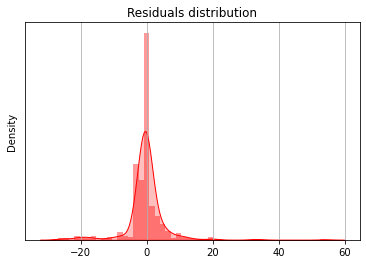

In [ ]:
fig, ax = plt.subplots()
sns.distplot(residuals, color="red", hist=True, kde=True, kde_kws={"shade":True}, ax=ax)
ax.grid(True)
ax.set(yticks=[], yticklabels=[], title="Residuals distribution")
plt.show()

In [ ]:
print("True:", "{:,.0f}".format(y_test[1]), "--> Pred:", "{:,.0f}".format(predictions[1]))

True: 2 --> Pred: 1


In [ ]:
# explainer = lime_tabular.LimeTabularExplainer(training_data=X_train, feature_names=X_names, class_names="Y", mode="regression")
# explained = explainer.explain_instance(X_test[1], model.predict, num_features=10)
# explained.as_pyplot_figure()